In [1]:
%reset
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp

from scipy.optimize import bisect

import seaborn as sns # for color palettes

#init_printing()
plt.rc('text', usetex=True)

sns.set_style("white")
sns.set_style("ticks")

# get rid of margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


The following functions define:

* Pivot probability (eq. 1):

$\pi_{k,n}(p) =  \binom{n-1}{k-1} p^{k-1} (1-p)^{n-k}$

* Critical participation cost (eq. 3):

$\bar{c}_{k,n} = \pi_{k,n}((k-1)/(n-1))$

* Maximal equilibrium (eq. 4, see also Lemma 1):

$p_{k,c}(n) = \max \mathcal{P}_{k,c,n}
= \left\{
	\begin{array}{ll}
		0  & \mbox{if } c > \bar{c}_{k,n} \\
        \frac{k-1}{n-1} & \mbox{if } c = \bar{c}_{k,n} \\
		\text{the unique solution to } \pi_{k,n}(p) = c & \mbox{if } c < \bar{c}_{k,n}
	\end{array}
\right.$

* Probability that at least $k$ out of the $n$ group members participate in the symmetric strategy profile $p$ (eq. 6): 

$\Pi_{k,n}(p) =  \sum_{\ell = k}^n  \binom{n}{\ell} p^{\ell} (1-p)^{n-\ell}$

* Probability that the public good is provided at the maximal equilibrium (eq. 5):

$\phi_{k,c}(n) = \Pi_{k,n}(p_{k,c}(n))$

* Expected payoff at the maximal equilibrium (eq. 7):

$u_{k,c}(n) = \phi_{k,c}(n) -  p_{k,c}(n) \cdot c = \Pi_{k,n-1}(p_{k,c}(n))$

* Expected number of contributors at the maximal equilibrium (eq. 8):

$\mu_{k,c}(n) = n \cdot p_{k,c}(n)$

* Poisson distribution's probability mass function (eq. 19):

$g(x,\lambda) = \frac{\lambda^x e^{- \lambda}}{x!}, ~~ x = 0,1, \ldots,$

* Limit critical participation cost

$\bar c^*_k = \lim_{n \rightarrow \infty} \bar{c}_{k,n} = g(k-1,k-1)$

* Function $G(x,\lambda)$ (eq. 22):

$ G(x,\lambda) = \sum_{y \ge x} g(y,\lambda), ~~ x = 0,1, \ldots$

* Limit expected number of other group members that will contribute to the public good in the maximal equilibrium (Lemma 3)

$\lambda_{k,c}^* = \lim_{n \rightarrow \infty} \lambda_{k,c}(n)$, which is given by the unique solution to the condition $g(k-1,\lambda) = c$ that satisfies $\lambda \ge k-1$.

* The function $h:Q \rightarrow P$, where $Q = [(k-1)/n,1))$ and $P = ((k-1)/(n-1),1)$ defined so that for all  $q \in Q$  there exists a unique $h(q) \in P$ such that

$\pi_{k,n}(h(q)) = \pi_{k,n+1}(q)$

holds (proof of Proposition 2). 

In [2]:
# pivot probability (Eq. 1)
def pikn(p,k,n):
    return sp.stats.binom.pmf(k-1,n-1,p)
    #return sp.special.binom(n-1,k-1)*(p**(k-1))*(1-p)**(n-k)

# critical participation cost
def cbarkn(k,n):
    return pikn((k-1.)/(n-1.),k,n)

# function to use the bisect method
def pkcn_bisect(p, *params):
    k, n, c = params
    return pikn(p,k,n)-c

# maximal equilibrium
def pkcn(n,k,c):
    if n < k:
        return 0.
    elif n == k:
        return 1.
    else:
        if c > cbarkn(k,n):
            return 0
        elif c == cbarkn(k,n):
            return (k-1.)/(n-1.)
        else:
            return bisect(pkcn_bisect,(k-1.)/(n-1.),1.,args=(k,n,c))
        
# the second (non-trivial) symmetric equilibrium:
def ppkcn(n,k,c):
    return bisect(pkcn_bisect,0.,(k-1.)/(n-1.),args=(k,n,c))

# probability that at least k out of the n group members participate in the symmetric strategy profile p 
#def Pikn(p,k,n):
#    z = 0
#    for l in range(k,n+1):
#        z = z + sp.special.binom(n,l)*(p**(l))*(1-p)**(n-l)
#    return z

def Pikn(p,k,n):
    return 1.-sp.stats.binom.cdf(k-1,n,p)

# probability that the public good is provided at the maximal equilibrium
def phikcn(n,k,c):
    return Pikn(pkcn(n,k,c),k,n)

# expected payoff at the maximal equilibrium
def ukcn(n,k,c):
    return Pikn(pkcn(n,k,c),k,n-1)

# expected number of contributors at the maximal equilibrium 
def mukcn(n,k,c):
    return n*pkcn(n,k,c)

# Poisson distribution's probability mass function
def g(x,lamda):
    return sp.stats.poisson.pmf(x,lamda)

# G(x,lamda) (eq. 21)
def G(x,lamda):
    return 1.-sp.stats.poisson.cdf(x-1,lamda)

def lamdakc_bisect(lamda, *params):
    k, c = params
    return g(k-1,lamda)-c

def lamdakc(k,c,n): # parameter n only required to give an upper bound for the bisect function
    return bisect(lamdakc_bisect,(k-1),n,args=(k,c))

# function to use the bisect method
def h_bisect(p, *params):
    q, k, n = params
    return pikn(p,k,n)-pikn(q,k,n+1)

def h(q,k,n):
    return bisect(h_bisect,(k-1.)/(n-1.),1,args=(q, k,n))

In [3]:
color1 = sns.xkcd_rgb["denim blue"]
color2 = sns.xkcd_rgb["pale red"]
color3 = sns.xkcd_rgb["blue green"]
color4 = sns.xkcd_rgb["pale orange"]

alpha1 = 1.0
alpha2 = 0.5

grey = sns.xkcd_rgb["grey"]

lw = 3
fontsize = 15
fontsizelegend = 15
markersize = 10

The following code reproduces Fig. 1 in the paper.

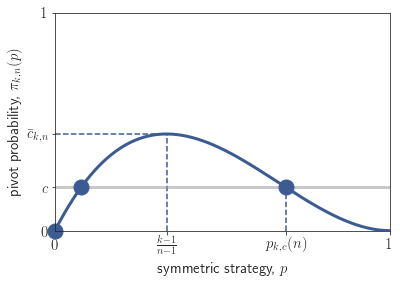

In [15]:
c = 0.2 # cost
k = 2 # threshold
n = 4 # group size

p = np.linspace(0.,1.,num=1000)
y = pikn(p,k,n)
cmax = cbarkn(k,n)


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.xaxis.set_label_position('bottom') 
ax1.yaxis.set_label_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

line1, = ax1.plot(p,y,linestyle='-',linewidth=lw,color=color1)
ax1.axhline(y=c,linestyle='-',linewidth=lw,color=grey,alpha=0.5)

# plot trivial equilibrium
ax1.plot(0,0,color=color1,marker='o',markersize=15,alpha=alpha1,clip_on=False)

# plot maximal equilibrium
ax1.plot(pkcn(n,k,c),c,color=color1,marker='o',markersize=15,alpha=alpha1,clip_on=False)

# plot the other non-trivial equilibrium
ax1.plot(ppkcn(n,k,c),c,color=color1,marker='o',markersize=15,alpha=alpha1,clip_on=False)


ax1.vlines(x=(k-1.)/(n-1.),ymin=0,ymax=cmax,linestyle='--',color=color1,alpha=alpha1)
ax1.vlines(x=pkcn(n,k,c),ymin=0,ymax=c,linestyle='--',color=color1,alpha=alpha1)

ax1.hlines(y=cmax,xmin=0,xmax=(k-1.)/(n-1.),linestyle='--',color=color1,alpha=alpha1)

ax1.set_xticks([0,(k-1.)/(n-1.),pkcn(n,k,c),1])
ax1.set_xticklabels(['$0$','$\\frac{k-1}{n-1}$','$p_{k,c}(n)$','$1$'],fontsize=fontsize,rotation='horizontal')
ax1.set_xlabel('symmetric strategy, $p$',fontsize=fontsize)

ax1.set_yticks([0,c,cmax,1])
ax1.set_yticklabels(['$0$','$c$','$\\bar{c}_{k,n}$','$1$'],fontsize=fontsize)
ax1.set_ylabel('pivot probability, $\pi_{k,n}(p)$',fontsize=fontsize)

plt.savefig('Fig1.pdf',bbox_inches='tight')

The following code reproduces Fig. 2 in the paper.

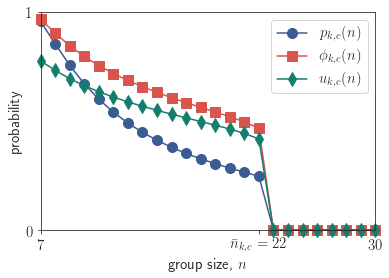

In [16]:
markersize = 10

k = 6
c = 0.2

nmin = k+1
nmax = 30

ns = range(nmin,nmax+1)
ps = np.zeros(len(ns))
phis = np.zeros(len(ns))
us = np.zeros(len(ns))

for n in ns:
    ps[n-nmin] = pkcn(n,k,c) # probability of contribution
    phis[n-nmin] = phikcn(n,k,c) # probability of provision
    us[n-nmin] = ukcn(n,k,c) # expected payoff

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.xaxis.set_label_position('bottom') 
ax1.yaxis.set_label_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

line1, = ax1.plot(ns,ps,linestyle='-',color=color1,marker='o',markersize=markersize,clip_on=False)
line2, = ax1.plot(ns,phis,linestyle='-',color=color2,marker='s',markersize=markersize,clip_on=False)
line3, = ax1.plot(ns,us,linestyle='-',color=color3,marker='d',markersize=markersize,clip_on=False)

ax1.set_xticks([7,22,nmax])
ax1.set_xticklabels(['$7$','$\\bar{n}_{k,c}=22$','$30$'], fontsize = fontsize, rotation = 'horizontal')
ax1.set_xlabel('group size, $n$', fontsize = fontsize)

ax1.set_yticks([0,1])
ax1.set_yticklabels(['$0$','$1$'],fontsize=fontsize,rotation = 'horizontal')
ax1.set_ylabel('probability', fontsize = fontsize)

plt.legend((line1, line2, line3),('$p_{k,c}(n)$','$\\phi_{k,c}(n)$','$u_{k,c}(n)$'),loc='upper right',fontsize=fontsizelegend)

plt.savefig('Fig2.pdf',bbox_inches='tight')

The following code reproduces Fig. 3 in the paper.

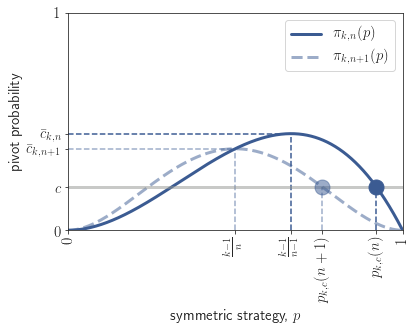

In [17]:
c = 0.2 # cost
k = 3 # threshold
n = 4 # group size

p = np.linspace(0.,1.,num=1000)

y1 = pikn(p,k,n+1)
y2 = pikn(p,k,n)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.xaxis.set_label_position('bottom') 
ax1.yaxis.set_label_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

line1, = ax1.plot(p,y1,linestyle='--',linewidth=lw,color=color1,alpha=alpha2)
line2, = ax1.plot(p,y2,linestyle='-',linewidth=lw,color=color1,alpha=alpha1)
ax1.axhline(y=c,linestyle='-',linewidth=lw,color=grey,alpha=alpha2)

p1 = (k-1)*1./n
c1 = cbarkn(k,n+1)
pstar1 = pkcn(n+1,k,c)

p2 = (k-1)*1./(n-1)
c2 = cbarkn(k,n)
pstar2 = pkcn(n,k,c)

ax1.vlines(x=p1,ymin=0,ymax=c1,linestyle='--',color=color1,alpha=alpha2)
ax1.vlines(x=p2,ymin=0,ymax=c2,linestyle='--',color=color1,alpha=alpha1)

ax1.vlines(x=pstar1,ymin=0,ymax=c,linestyle='--',color=color1,alpha=alpha2)
ax1.vlines(x=pstar2,ymin=0,ymax=c,linestyle='--',color=color1,alpha=alpha1)

ax1.plot(pstar1,c,color=color1,marker='o',markersize=15,alpha=alpha2)
ax1.plot(pstar2,c,color=color1,marker='o',markersize=15,alpha=alpha1)

ax1.hlines(y=c1,xmin=0,xmax=p1,linestyle='--',color=color1,alpha=alpha2)
ax1.hlines(y=c2,xmin=0,xmax=p2,linestyle='--',color=color1,alpha=alpha1)

ax1.set_xticks([0,p1,p2,pstar1,pstar2,1])
ax1.set_xticklabels(['$0$','$\\frac{k-1}{n}$','$\\frac{k-1}{n-1}$','$p_{k,c}(n+1)$','$p_{k,c}(n)$','$1$'],fontsize=fontsize,rotation=90)
ax1.set_xlabel('symmetric strategy, $p$',fontsize=fontsize)

ax1.set_yticks([0,c,c1,c2,1])
ax1.set_yticklabels(['$0$','$c$','$\\bar{c}_{k,n+1}$','$\\bar{c}_{k,n}$','$1$'],fontsize=fontsize)
ax1.set_ylabel('pivot probability',fontsize=fontsize)

plt.legend((line2, line1),('$\pi_{k,n}(p)$','$\pi_{k,n+1}(p)$'),loc='upper right',fontsize=fontsizelegend)

plt.savefig('Fig3.pdf',bbox_inches='tight')

The following code reproduces Fig. 4 in the paper.

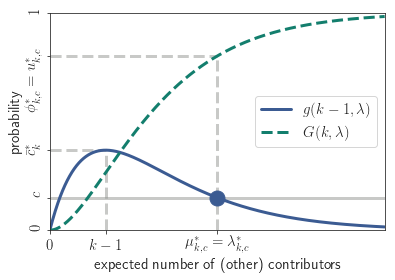

In [18]:
c = 0.15 # cost
k = 2 # required number of volunteers
n = 6

lamda = np.linspace(0.,n,num=1000)

l = lamdakc(k,c,n)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.xaxis.set_label_position('bottom') 
ax1.yaxis.set_label_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

line1, = ax1.plot(lamda,g(k-1,lamda),linestyle='-',linewidth=lw,color=color1)
line2, = ax1.plot(lamda,G(k,lamda),linestyle='--',linewidth=lw,color=color3)

ax1.hlines(y=c,xmin=0,xmax=n,linestyle='-',linewidth=lw,color=grey,alpha=alpha2)

ax1.vlines(x=k-1,ymin=0,ymax=g(k-1,k-1),linestyle='--',linewidth=lw,color=grey,alpha=alpha2)
ax1.vlines(x=l,ymin=0,ymax=G(k,l),linestyle='--',linewidth=lw,color=grey,alpha=alpha2)
ax1.hlines(y=g(k-1,k-1),xmin=0,xmax=k-1,linestyle='--',linewidth=lw,color=grey,alpha=alpha2)
ax1.hlines(y=G(k,l),xmin=0,xmax=l,linestyle='--',linewidth=lw,color=grey,alpha=alpha2)

ax1.plot(l,c,color=color1,marker='o',markersize=15,alpha=alpha1)

ax1.set_xticks([0,k-1,l])
ax1.set_xticklabels(['$0$','$k-1$','$\mu^*_{k,c}=\\lambda^{*}_{k,c}$'],fontsize=fontsize,rotation=0)
ax1.set_xlabel('expected number of (other) contributors',fontsize=fontsize)

ax1.set_yticks([0,c,g(k-1,k-1),G(k,l),1])
ax1.set_yticklabels(['$0$','$c$','$\\bar{c}^*_{k}$','$\\phi^{*}_{k,c}=u^{*}_{k,c}$','$1$'],fontsize=fontsize,rotation=90)
ax1.set_ylabel('probability',fontsize=fontsize)

plt.legend((line1, line2),('$g(k-1,\lambda)$','$G(k,\lambda)$'),loc='center right',fontsize=fontsizelegend)
plt.savefig('Fig4.pdf',bbox_inches='tight')